### Получение данных и визуализация статистики

#### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd

#### Чтение файла

In [2]:
df = pd.read_csv("WineDataset.csv")

#### Визуализация статистики по датасету

In [3]:
df.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


#### Матрица корреляции

<Axes: >

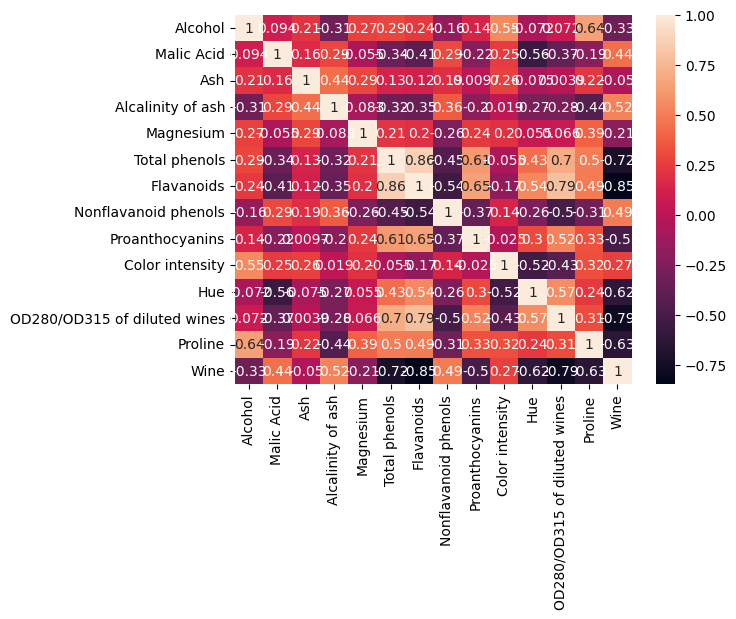

In [4]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

### Предварительная обработка данных

#### Вывод количества отсутствующих значений по каждой колонке датасета

In [5]:
df.isna().sum()

Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Wine                            0
dtype: int64

В датасете нет пустых значений, следовательно, обрабатывать нечего :)

#### Поиск категориальных признаков

In [6]:
df.dtypes

Alcohol                         float64
Malic Acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                       float64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                         float64
Wine                              int64
dtype: object

В датасете нет категориальных признаков, следовательно, кодировать нечего :))

#### Стандартизация

In [7]:
for column in df:
	if column == "Wine": continue
	column_mean, column_std = df[column].mean(), df[column].std()
	df[column] = (df[column] - column_mean) / column_std
df

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,1
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,1
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,1
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,1
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890,3
174,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866,3
175,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786,3
176,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664,3


### Решение задачи классификации

#### Метод k-ближайших соседей (ручной)

In [24]:
from math import sqrt

def find_weight(test_object, train_object: pd.Series):
	weight = 0
	for index, value in train_object.items():
		weight += pow(test_object[index] - value, 2) 
	return sqrt(weight)

def get_sorted_weights(test_object_value, train_df):
	weights = dict()
	for index, row in train_df.iterrows():
		weights[index] = find_weight(test_object_value, row)
	return dict(sorted(weights.items(), key=lambda x:x[1]))

def get_knn_prediction(X_train, Y_train, X_test, n_neighbors=3):
	print("Количество ближайших соседей:", n_neighbors)
	prediction = pd.Series()
	for index, row in X_test.iterrows():
		closest_indices = list(get_sorted_weights(row, X_train).keys())[0:n_neighbors]
		classes = [Y_train[i] for i in closest_indices]
		prediction[index] = max(set(classes), key = classes.count)
	return prediction

#### Матрица ошибок

In [9]:
def get_confustion_matrix(Y_test, pred):
	confusion_matrix = np.zeros((3, 3), dtype=int)
	for index, value in Y_test.items():
		confusion_matrix[value - 1][pred[index] - 1] += 1
	return confusion_matrix

#### f1-оценка для каждой колонки

In [10]:
def get_f1_scores(confusion_matrix):
	scores = []
	for i in range(len(confusion_matrix)):
		precision = confusion_matrix[i][i] / sum(confusion_matrix[i])
		recall = confusion_matrix[i][i] / sum([confusion_matrix[j][i] for j in range(len(confusion_matrix))])
		scores.append(2 * precision * recall / (precision + recall))
	return scores

#### Вывод статистики

In [11]:
def print_statistics(Y_test, pred):
	confusion_matrix = get_confustion_matrix(Y_test, pred)
	f1_scores = get_f1_scores(confusion_matrix)

	print("Статистика модели\n")
	print("Матрица ошибок:")
	for el in confusion_matrix:
		print(f"  {el}")
	print()

	print("Оценка модели:")
	for i, el in enumerate(f1_scores):
		print(f"  Класс {i + 1}: {el}")

### Модели

#### Модель 1

In [25]:
from sklearn.model_selection import train_test_split
import random

Y, X = df.Wine, df.drop(columns=["Wine"])
number_of_columns = random.randint(3, 13)
columns = X.columns.values.tolist()
picked_columns = random.sample(columns, number_of_columns)
print("Были выбраны следующие колонки:")
for i, el in enumerate(picked_columns):
	print(f"  {i + 1}. {el}")
print()
X = X[picked_columns]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
pred = get_knn_prediction(X_train, Y_train, X_test, n_neighbors=5)

Были выбраны следующие колонки:
  1. Nonflavanoid phenols
  2. Proanthocyanins
  3. Hue
  4. Flavanoids
  5. Color intensity

Количество ближайших соседей: 5


In [26]:
print_statistics(Y_test, pred)

Статистика модели

Матрица ошибок:
  [19  0  0]
  [ 5 15  2]
  [ 0  0 13]

Оценка модели:
  Класс 1: 0.8837209302325582
  Класс 2: 0.8108108108108109
  Класс 3: 0.9285714285714286


#### Модель 2

In [21]:
Y, X = df.Wine, df.drop(columns=["Wine"])
print("Какие из следующих колонок Вы хотите выбрать для классификации?")
for i, el in enumerate(X.columns.values.tolist()):
	print(f"  {i + 1}. {el}")

Какие из следующих колонок Вы хотите выбрать для классификации?
  1. Alcohol
  2. Malic Acid
  3. Ash
  4. Alcalinity of ash
  5. Magnesium
  6. Total phenols
  7. Flavanoids
  8. Nonflavanoid phenols
  9. Proanthocyanins
  10. Color intensity
  11. Hue
  12. OD280/OD315 of diluted wines
  13. Proline


In [22]:
picked_columns = [X.columns.values[int(i)-1] for i in input("Запишите номера выбранных колонок через пробел: ").split()]
print("Были выбраны следующие колонки:")
for i, el in enumerate(picked_columns):
	print(f"  {i + 1}. {el}")
print()
X2 = X[picked_columns]
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3, random_state=0)
pred = get_knn_prediction(X_train, Y_train, X_test, n_neighbors=5)

Были выбраны следующие колонки:
  1. Alcohol
  2. Ash
  3. Magnesium
  4. Color intensity

Количество ближайших соседей: 5


In [23]:
print_statistics(Y_test, pred)

Статистика модели

Матрица ошибок:
  [19  0  0]
  [ 2 20  0]
  [5 0 8]

Оценка модели:
  Класс 1: 0.8444444444444443
  Класс 2: 0.9523809523809523
  Класс 3: 0.761904761904762
